# Cargo librerías y el dataset

In [ ]:
import numpy as np #manejo de arreglos
import matplotlib.pyplot as plt #gráficos
from sklearn import datasets #conjuntos de datos
from sklearn.decomposition import PCA #Componentes principales
import pandas as pd #manejo de arreglos, parecido al dataframe de R
from sklearn.preprocessing import StandardScaler #Escalado de datos

plt.rcParams["figure.figsize"] = (20,10) #tamaño de los gráficos

#Cargo el dataset
iris = datasets.load_iris()
X = iris.data #features o características
y = iris.target #target o clasificación

# Exploración de los datos

In [ ]:
from random import sample

print(X.shape)
print(iris.feature_names)
print(X[0:10,])

print(y.shape)

# print(iris.target_names)
# print(iris.target_filename)
# print(iris.target)
print(np.random.choice(y,10))

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150,)
[2 2 1 1 1 1 1 1 2 0]


# Gráficos iniciales

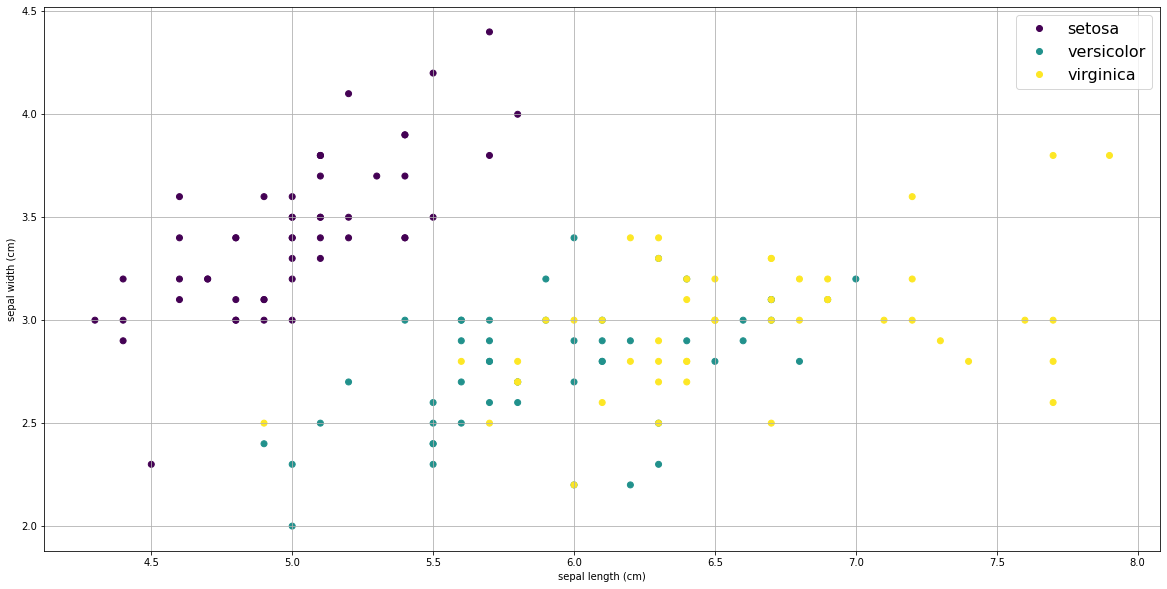

In [ ]:
feature_0 = 0
feature_1 = 1
scatter = plt.scatter(X[:,feature_0], X[:,feature_1], c=y)

#leyendas de cada clase en el gráfico
clases = list(iris.target_names)
plt.legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=16)

plt.xlabel(iris.feature_names[feature_0])
plt.ylabel(iris.feature_names[feature_1])
plt.grid()

# Componentes principales

In [ ]:
# Escalo los datos: en general es buena idea para que el algoritmo funcione mejor
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Componentes principales
pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)

#Varianza explicada por cada componente
print(pca.explained_variance_ratio_)
print([round(x,3) for x in pca.explained_variance_ratio_])

#Cargas o loadings
print(pca.components_)

[0.72962445 0.22850762 0.03668922 0.00517871]
[0.73, 0.229, 0.037, 0.005]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


([<matplotlib.lines.Line2D object at 0x7f742498f750>, <matplotlib.lines.Line2D object at 0x7f7424980310>, <matplotlib.lines.Line2D object at 0x7f7426f53f50>], ['$\\mathdefault{0}$', '$\\mathdefault{1}$', '$\\mathdefault{2}$'])


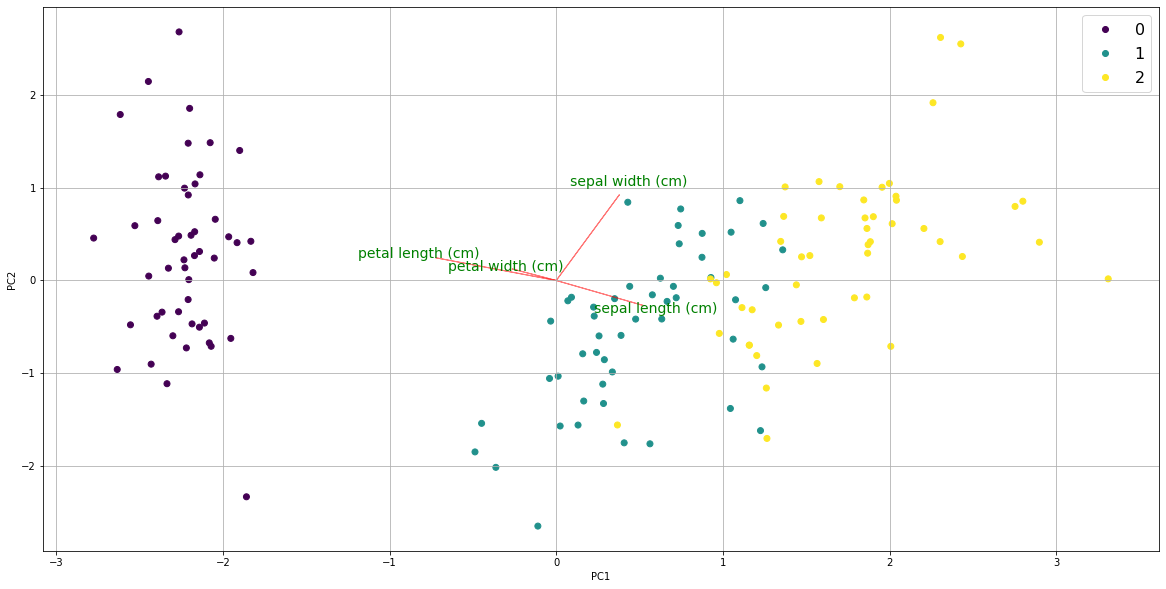

In [ ]:
# Función para graficar el biplot de PCA
def myplot(score,coeff,labels=None):
    x1 = score[:,0]
    x2 = score[:,1]
    n = coeff.shape[0]

    scatter = plt.scatter(x1, x2, c=y)#, cmap=colours)
    
    print(scatter.legend_elements())
    plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

    # flechas de las proyecciones de las variables originales
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center', fontsize=14)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', fontsize=14)



#Grafico las primeras dos componentes principales 
myplot(x_new[:,0:2], pca.components_, iris.feature_names)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

# Ejemplo levantando datos de un csv

In [ ]:
#https://www.kaggle.com/ronitf/heart-disease-uci
#la primera fila son los nombres
datos = np.loadtxt('./heart.csv',delimiter=',', skiprows=1)#, usecols = (0,2,3,4,5,6,7,8) )

print(datos.shape)
print(datos[0:5,:])

nombres = ['age','sex','cp','rbs','sc','fbs120','recr','mhr','eia','op','slope','ca','thal']#,'target']

# 1.age
# 2.sex
# 3.chest pain type (4 values)
# 4.resting blood pressure
# 5.serum cholestoral in mg/dl
# 6.fasting blood sugar > 120 mg/dl
# 7.resting electrocardiographic results (values 0,1,2)
# 8.maximum heart rate achieved
# 9.exercise induced angina
# 10.oldpeak = ST depression induced by exercise relative to rest
# 11.the slope of the peak exercise ST segment
# 12.number of major vessels (0-3) colored by flourosopy
# 13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# 14.target: 1 o 0

X = datos[:,0:-1]
print(X.shape)
print(X[0:5,:])

y = datos[:,-1]
print(y.shape)
print(y[0:5])

(303, 14)
[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1.    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2.    1. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2.    1. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2.    1. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2.    1. ]]
(303, 13)
[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]
(303,)
[1. 1. 1. 1. 1.]


In [ ]:
# Escalo los datos: en general es buena idea para que el algoritmo funcione mejor
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Componentes principales
pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)

#Varianza explicada por cada componente
print(pca.explained_variance_ratio_)
print([round(x,3) for x in pca.explained_variance_ratio_])

#Cargas o loadings
print(pca.components_)

[0.21254053 0.11820708 0.09406418 0.09085735 0.07861281 0.07461661
 0.06636692 0.05968811 0.05530196 0.04781309 0.04077729 0.03254941
 0.02860467]
[0.213, 0.118, 0.094, 0.091, 0.079, 0.075, 0.066, 0.06, 0.055, 0.048, 0.041, 0.033, 0.029]
[[ 0.31420252  0.09083783 -0.27460749  0.18392019  0.11737503  0.07363999
  -0.12772792 -0.41649811  0.36126745  0.41963899 -0.37977222  0.27326172
   0.22202375]
 [ 0.40614872 -0.37779171  0.29726609  0.43818675  0.36451402  0.31743328
  -0.22088181  0.07787618 -0.2631179  -0.05225497  0.04837415  0.09414721
  -0.20072042]
 [-0.09407661  0.55484915  0.35697431  0.2038493  -0.40782498  0.48173624
  -0.08919083  0.15825529 -0.1263561   0.1103429  -0.07381839  0.18356934
   0.12501113]
 [-0.0206618  -0.25530873  0.28790041  0.02260103 -0.34340982 -0.06860532
   0.26609555 -0.18412539 -0.11505621  0.32629597 -0.49484894 -0.32801632
  -0.38919138]
 [-0.30715312  0.0507044   0.16317945  0.18813809  0.3200667  -0.23344184
  -0.39366727  0.32328431  0.0345356

In [ ]:
#Grafico las primeras dos componentes principales
# def myplot(score,coeff,labels=None,target_names=None):
#     x1 = score[:,0]
#     x2 = score[:,1]
#     n = coeff.shape[0]

#     # clases = target_names
#     scatter = plt.scatter(x1, x2, c=yo)#, cmap=colours)
#     # plt.legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=16)
#     print(scatter.legend_elements())
#     plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

#     # flechas de las proyecciones de las variables originales
#     for i in range(n):
#         plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
#         if labels is None:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center', fontsize=14)
#         else:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', fontsize=14)



#Grafico las primeras dos componentes principales 
myplot(x_new[:,0:2], pca.components_, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

# Ejemplo aplicando PCA en datos sin clasificar

In [ ]:
#la primera fila son los nombres
datos = np.loadtxt('./heart.csv',delimiter=',', skiprows=1)

#Si no quiero usar todas las columnas
# datos = np.loadtxt('./heart.csv',delimiter=',', skiprows=1, usecols = (0,2,3,4,5) )


print(datos.shape)
print(datos[0:5,:])


nombres = ['age','sex','cp','rbs','sc','fbs120','recr','mhr','eia','op','slope','ca','thal']#,'target']
# nombres = ['age','cp','rbs','sc','fbs120']

# 1.age
# 2.sex
# 3.chest pain type (4 values)
# 4.resting blood pressure
# 5.serum cholestoral in mg/dl
# 6.fasting blood sugar > 120 mg/dl
# 7.resting electrocardiographic results (values 0,1,2)
# 8.maximum heart rate achieved
# 9.exercise induced angina
# 10.oldpeak = ST depression induced by exercise relative to rest
# 11.the slope of the peak exercise ST segment
# 12.number of major vessels (0-3) colored by flourosopy
# 13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# 14.target: 1 o 0


X = datos[:,0:-1]
# X = datos
print(X.shape)
print(X[0:5,:])

(303, 5)
[[ 63.   3. 145. 233.   1.]
 [ 37.   2. 130. 250.   0.]
 [ 41.   1. 130. 204.   0.]
 [ 56.   1. 120. 236.   0.]
 [ 57.   0. 120. 354.   0.]]
(303, 5)
[[ 63.   3. 145. 233.   1.]
 [ 37.   2. 130. 250.   0.]
 [ 41.   1. 130. 204.   0.]
 [ 56.   1. 120. 236.   0.]
 [ 57.   0. 120. 354.   0.]]


In [ ]:
# Escalo los datos: en general es buena idea para que el algoritmo funcione mejor
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Componentes principales
pca = PCA()
pca.fit(X)
x_new = pca.transform(X)

#Varianza explicada por cada componente
print(pca.explained_variance_ratio_)
print([round(x,3) for x in pca.explained_variance_ratio_])

#Cargas o loadings
print(pca.components_)

[0.2983649  0.22867642 0.17445736 0.16077892 0.1377224 ]
[0.298, 0.229, 0.174, 0.161, 0.138]
[[ 0.60144433 -0.02415954  0.57507626  0.41890617  0.36260991]
 [-0.16670928  0.70519022  0.18546872 -0.4196755   0.51418732]
 [-0.03972747  0.67829591 -0.02808014  0.55219981 -0.48231033]
 [-0.26192366 -0.04739864 -0.50984786  0.54573199  0.60941046]
 [-0.73504453 -0.19947706  0.61168236  0.21364001 -0.01100365]]


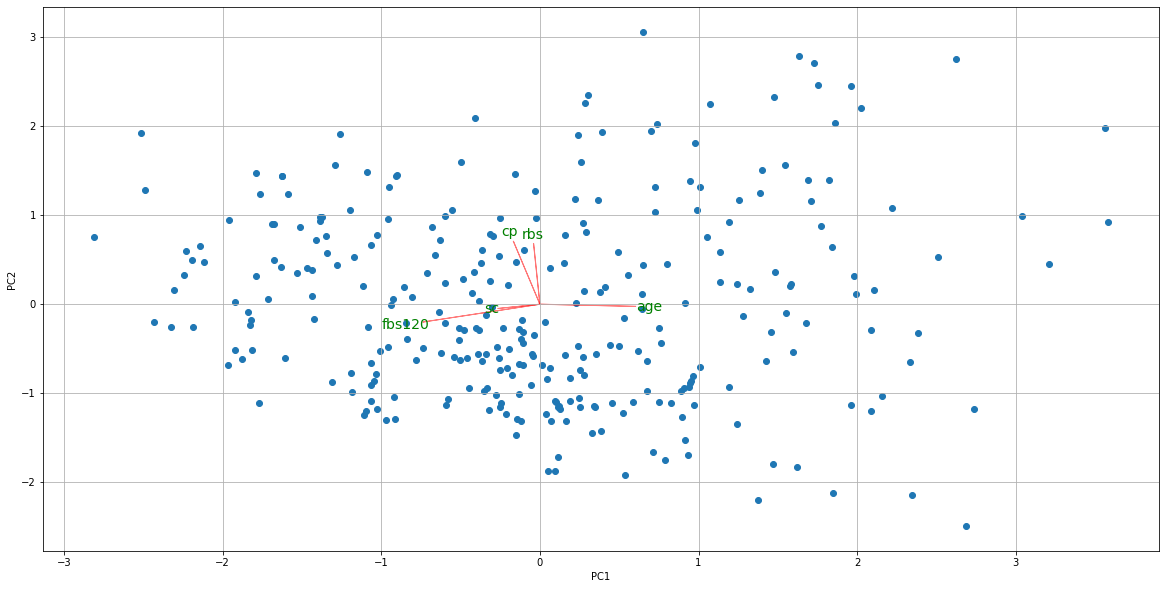

In [ ]:
# Función para graficar el biplot de PCA
def myplot(score,coeff,labels=None):
    x1 = score[:,0]
    x2 = score[:,1]
    n = coeff.shape[0]

    scatter = plt.scatter(x1, x2)#, c=y)#, cmap=colours)
    
    # print(scatter.legend_elements())
    # plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

    # flechas de las proyecciones de las variables originales
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center', fontsize=14)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', fontsize=14)



#Grafico las primeras dos componentes principales 
myplot(x_new[:,0:2], pca.components_,nombres)#
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()